# **Load the data file and the libraries**

In [1]:
# UPLOADING DATA FILE

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

ModuleNotFoundError: No module named 'google.colab'

In [2]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

Matplotlib is building the font cache; this may take a moment.


# **Display basic info about the dataset**

In [4]:
df = pd.read_csv('Automobile_data.csv')

display(df)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [ ]:
print('Dataframe number of records = '+str(df.shape[0]))
print('Dataframe number of variables = '+str(df.shape[1]))

Dataframe number of records = 205
Dataframe number of variables = 26


In [ ]:
#df['aspiration'][2] = np.nan

for col in df.columns.values:
  list_vals = pd.unique(df[col])
  print(col + ' is of type ' + str(df[col].dtypes) + ', has ' + str(len(list_vals)) + ' unique values, and ' + str(np.sum(pd.isnull(df[col]))) + ' null entries')
  if len(list_vals) < 10:
    list_str = ''
    for n_value in range(0,len(list_vals)):
      list_str = list_str + str(list_vals[n_value]) + ', '
    print('  These are: '+list_str[0:len(list_str)-2])
  #print('\n')

  #+' has '+str(len(pd.unique(df[col])))+' unique values : '+pd.unique(df[col]))

symboling is of type int64, has 6 unique values, and 0 null entries
  These are: 3, 1, 2, 0, -1, -2
normalized-losses is of type object, has 52 unique values, and 0 null entries
make is of type object, has 22 unique values, and 0 null entries
fuel-type is of type object, has 2 unique values, and 0 null entries
  These are: gas, diesel
aspiration is of type object, has 2 unique values, and 0 null entries
  These are: std, turbo
num-of-doors is of type object, has 3 unique values, and 0 null entries
  These are: two, four, ?
body-style is of type object, has 5 unique values, and 0 null entries
  These are: convertible, hatchback, sedan, wagon, hardtop
drive-wheels is of type object, has 3 unique values, and 0 null entries
  These are: rwd, fwd, 4wd
engine-location is of type object, has 2 unique values, and 0 null entries
  These are: front, rear
wheel-base is of type float64, has 53 unique values, and 0 null entries
length is of type float64, has 75 unique values, and 0 null entries
wid

# **Correct some column types**

In [5]:
df['price'] = pd.to_numeric(df['price'])

ValueError: Unable to parse string "?" at position 9

In [6]:
df['price'] = pd.to_numeric(df.replace({'price' : {'?':np.nan}})['price'])
df['normalized-losses'] = pd.to_numeric(df.replace({'normalized-losses' : {'?':np.nan}})['normalized-losses'])
df['stroke'] = pd.to_numeric(df.replace({'stroke' : {'?':np.nan}})['stroke'])
df['peak-rpm'] = pd.to_numeric(df.replace({'peak-rpm' : {'?':np.nan}})['peak-rpm'])
df['horsepower'] = pd.to_numeric(df.replace({'horsepower' : {'?':np.nan}})['horsepower'])
df['num-of-doors'] = pd.to_numeric(df.replace({'num-of-doors' : {'?':np.nan,'two':2,'four':4}})['num-of-doors'])
df['num-of-cylinders'] = pd.to_numeric(df.replace({'num-of-cylinders' : {'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8}})['num-of-cylinders'])

df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors         float64
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders       int64
engine-size            int64
fuel-system           object
bore                  object
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [ ]:
display(df)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,4.0,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,4.0,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,4.0,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,4,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,4.0,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,4,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,4.0,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,6,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,4.0,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,6,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


# **Study discrete variables**

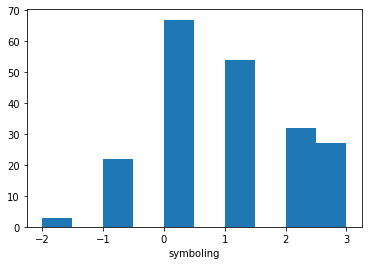

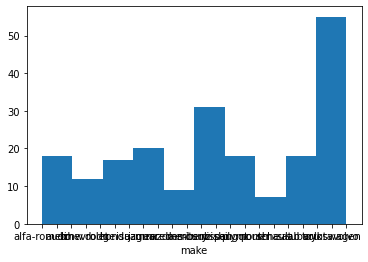

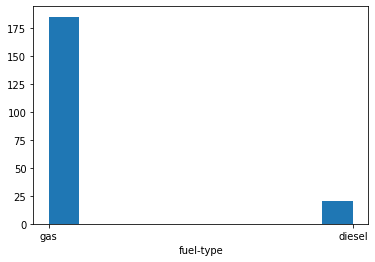

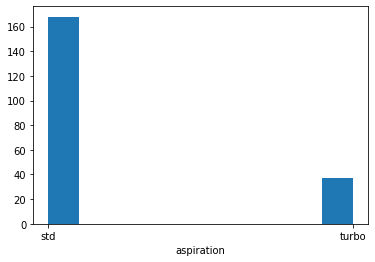

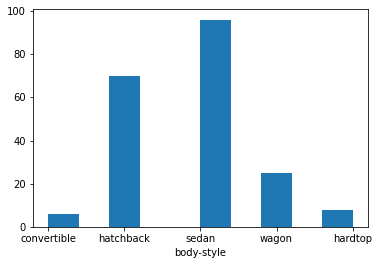

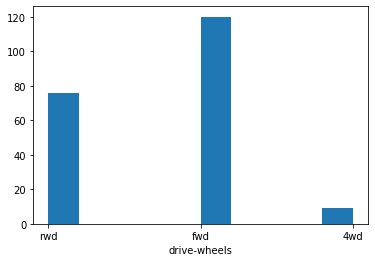

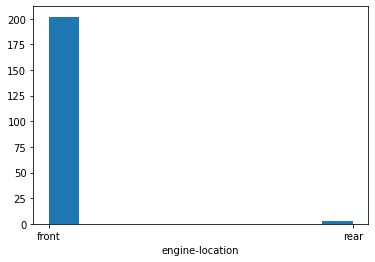

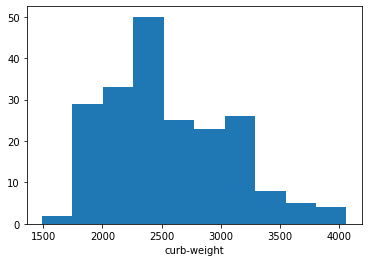

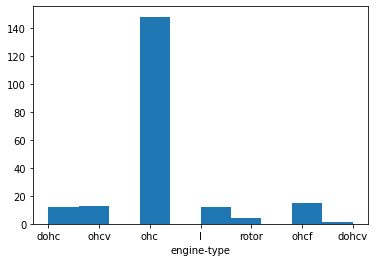

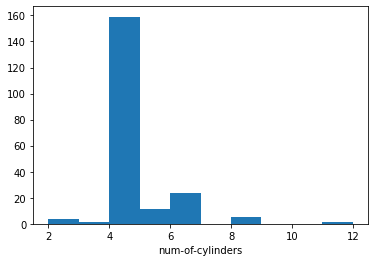

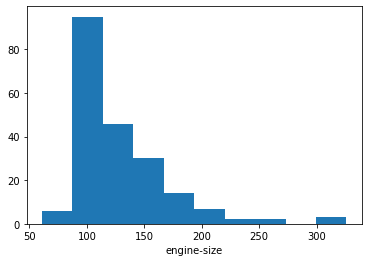

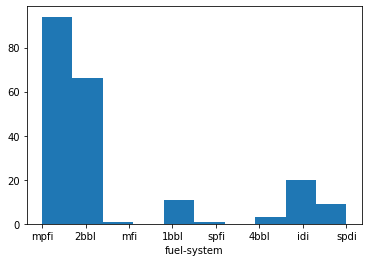

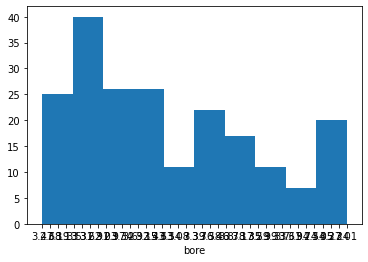

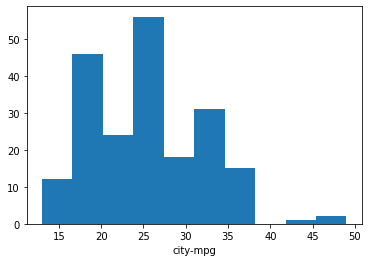

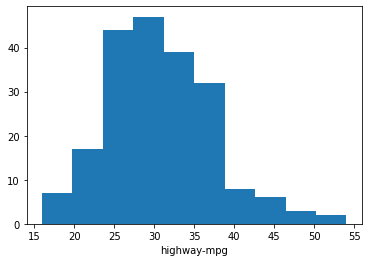

In [ ]:
for col in df.columns.values:
  if (df[col].dtypes == 'int64') | (df[col].dtypes == 'object'):
    plt.hist(df[col])
    plt.xlabel(col)
    plt.show()

# **Examining continuous variables**

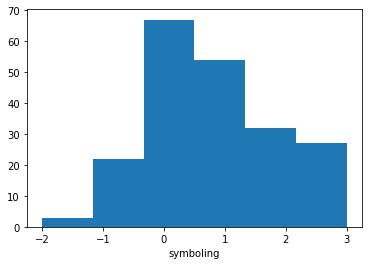

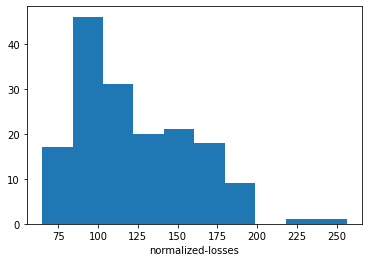

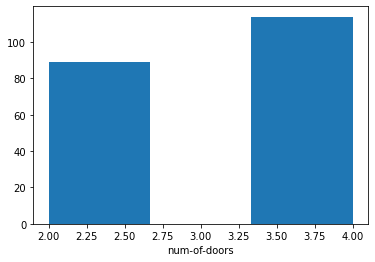

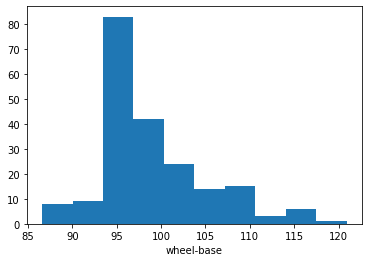

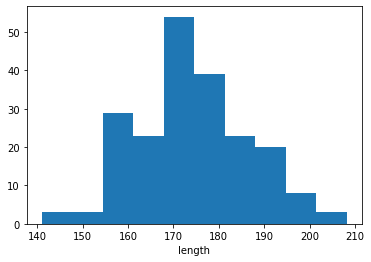

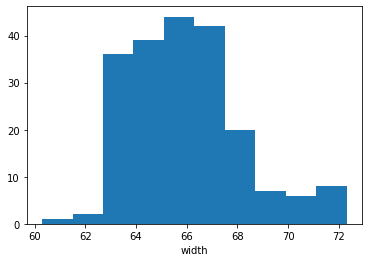

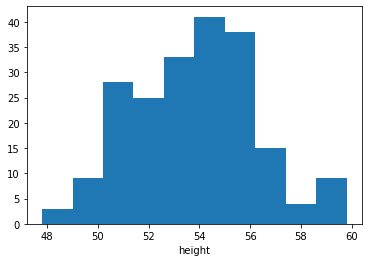

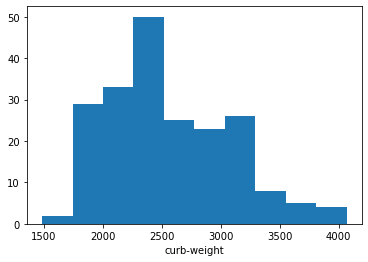

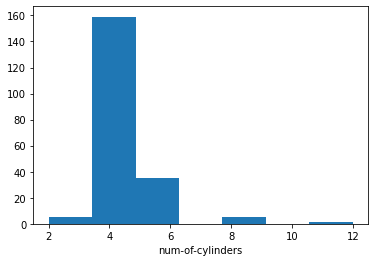

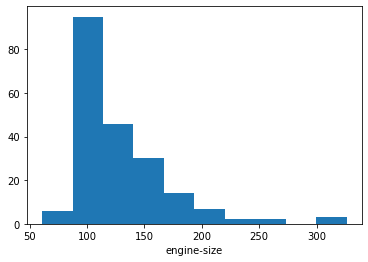

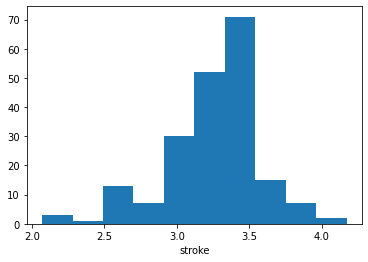

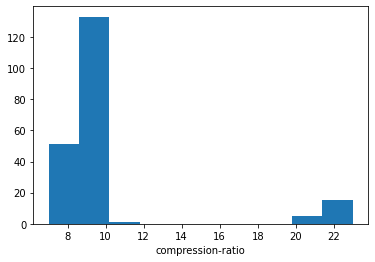

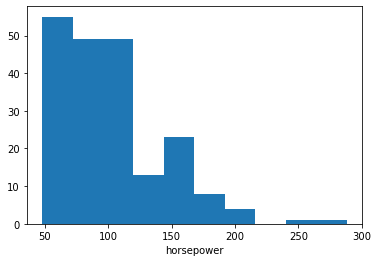

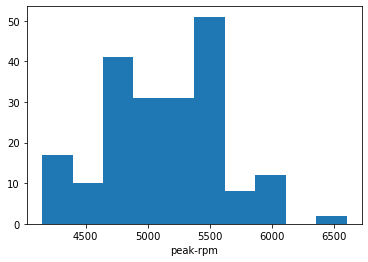

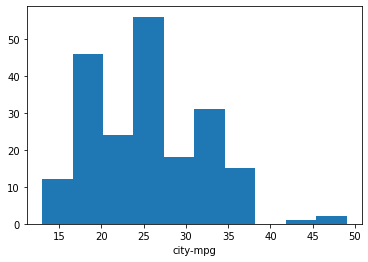

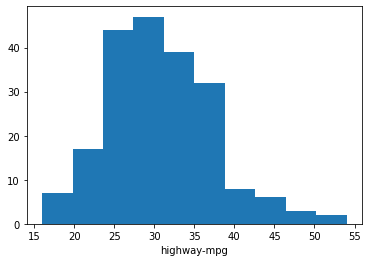

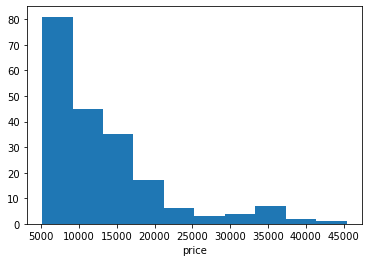

In [7]:
for col in df.columns.values:
  if (df[col].dtypes == 'int64') | (df[col].dtypes == 'float64'):
    plt.hist(df[col],10 if len(pd.unique(df[col]))>20 else len(pd.unique(df[col])))
    plt.xlabel(col)
    plt.show()

In [ ]:
df['wheel-base'].quantile([0.,.25,.5,.75,1.])

0.00     86.6
0.25     94.5
0.50     97.0
0.75    102.4
1.00    120.9
Name: wheel-base, dtype: float64

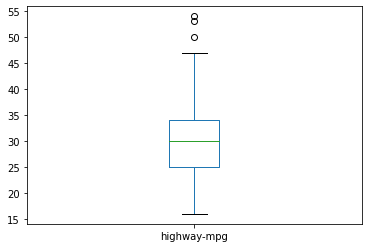

In [ ]:
df['highway-mpg'].plot.box()

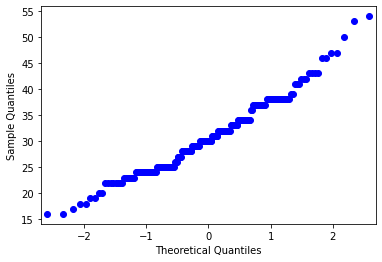

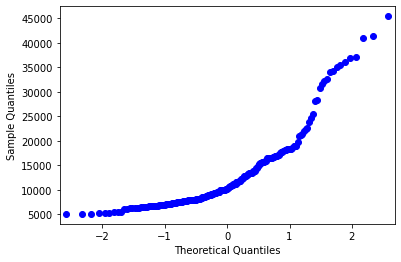

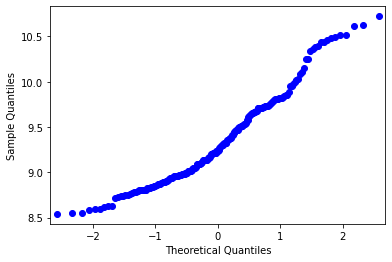

In [ ]:
import statsmodels.api as sm

fig = sm.qqplot(df['highway-mpg'].dropna())
plt.show()

fig = sm.qqplot(df['price'].dropna())
plt.show()

fig = sm.qqplot(np.log(df['price'].dropna()))
plt.show()


In [ ]:
pd.crosstab(df['fuel-type'],df['aspiration'])

aspiration,std,turbo
fuel-type,,
diesel,7,13
gas,161,24


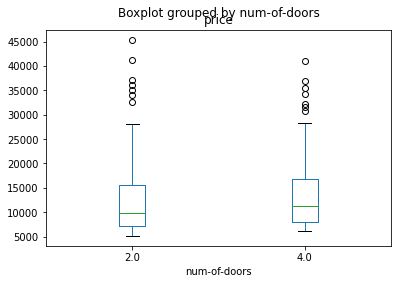

In [ ]:
df.boxplot(by='num-of-doors', column='price',grid=False)

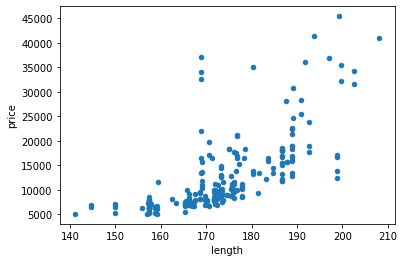

In [ ]:
df.plot.scatter(x='length',y='price')

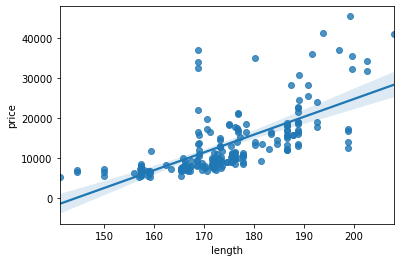

In [ ]:
sb.regplot(x='length', y='price',data=df)